# BSO Demo: Graph Coloring with Bee Swarm Optimization (New Implementation)

This notebook demonstrates running the updated BSOColoring implementation on a DIMACS‐style benchmark graph and visualizing the results.


In [ ]:
import sys, os
sys.path.insert(0, os.path.abspath('../src'))  # adjust if needed

#from bso_coloring import BSOColoring
from bso_coloring_optimised import BSOColoring
import networkx as nx
import matplotlib.pyplot as plt
import random

%matplotlib inline


In [2]:
def load_graph(path):
    G = nx.Graph()
    with open(path) as f:
        for line in f:
            parts = line.split()
            if not parts:
                continue
            if parts[0] == 'p':
                n = int(parts[1])
                G.add_nodes_from(range(1, n+1))
            elif parts[0] == 'e':
                u, v = map(int, parts[1:])
                G.add_edge(u, v)
    return G


In [3]:
# Choose your graph path
graph_path = '../data/benchmarks/test1.txt'
#graph_path = '../data/benchmarks/test2.txt'  # Uncomment to test with another graph
#graph_path = '../data/benchmarks/test3.txt'  # Uncomment to test with another graph
#graph_path = '../data/benchmarks/test4.txt'  # Uncomment to test with another graph
#graph_path = '../data/benchmarks/test_small20.txt'  # Uncomment to test with another graph
#graph_path = '../data/benchmarks/test_medium40.txt'  # Uncomment to test with another graph
G = load_graph(graph_path)
print(f"Loaded graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


Loaded graph with 138 nodes and 493 edges.


In [4]:
print(len(G))

138


In [5]:
# Instantiate and run the BSOColoring solver

solver = BSOColoring(
    G,
    k_max=None,
    n_bees=20,
    n_chance=2,
    max_iter=100,
    max_steps=10,
    flip=5,
    seed=42,
)

best_coloring, fitness = solver.run()

print(f"Best coloring: {best_coloring}")
print(f"Best fitness: {fitness[0]}  (Conflicts: {fitness[2]}, Colors used: {fitness[1]})")


Best coloring: [16, 105, 131, 18, 63, 133, 73, 63, 47, 27, 94, 3, 16, 64, 4, 37, 41, 8, 50, 129, 50, 65, 62, 65, 12, 94, 110, 78, 47, 125, 37, 35, 73, 10, 111, 41, 15, 78, 63, 83, 107, 31, 125, 94, 117, 21, 58, 111, 50, 98, 40, 130, 134, 83, 14, 18, 20, 84, 48, 29, 31, 95, 32, 80, 136, 130, 50, 23, 14, 59, 8, 19, 136, 95, 4, 62, 29, 125, 22, 72, 117, 125, 116, 15, 29, 116, 72, 18, 129, 84, 47, 62, 134, 100, 72, 40, 124, 2, 53, 74, 14, 25, 15, 50, 127, 131, 94, 53, 131, 79, 43, 126, 31, 33, 129, 80, 64, 130, 12, 63, 54, 67, 59, 48, 61, 65, 23, 63, 83, 70, 18, 83, 9, 133, 59, 35, 22, 2]
Best fitness: 69  (Conflicts: 0, Colors used: 69)


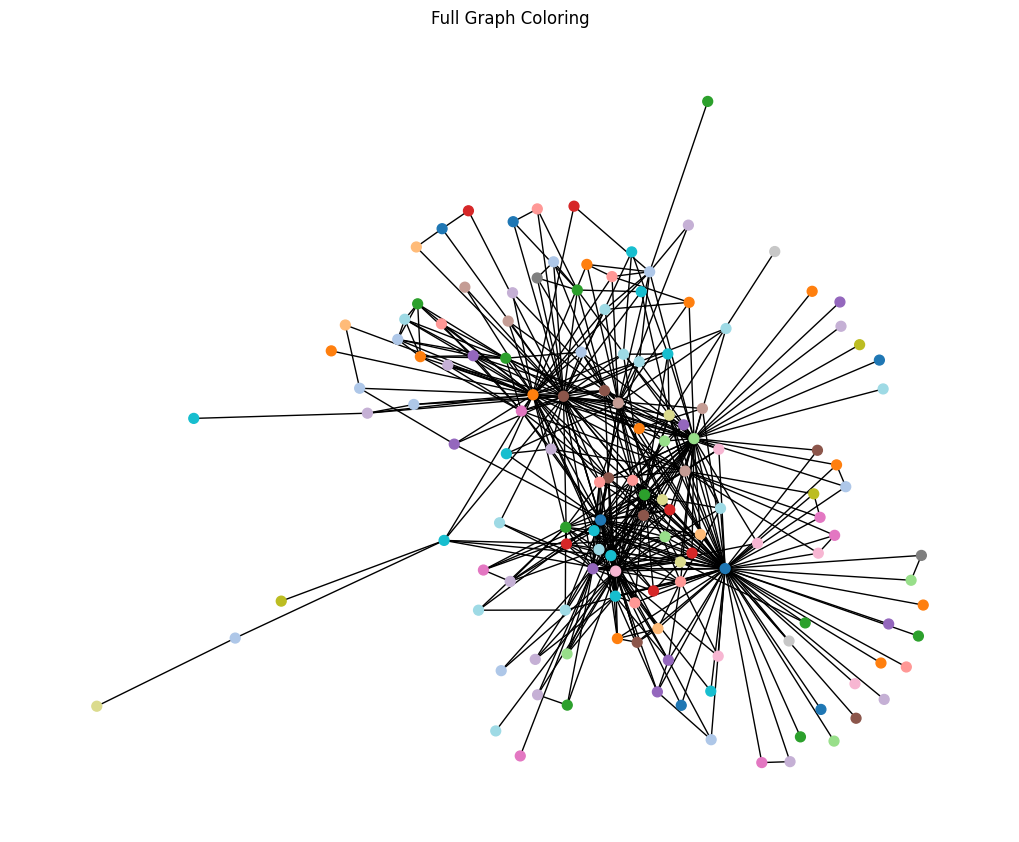

In [ ]:
# Visualize full graph coloring
pos_full = nx.spring_layout(G, seed=42)
colors_full = [best_coloring[node-1] for node in G.nodes()]

plt.figure(figsize=(10,8))
nx.draw(G, pos_full,
        with_labels=False,
        node_color=colors_full,
        cmap=plt.cm.tab20,
        node_size=50)
plt.title("Full Graph Coloring")
plt.show()
